<a href="https://colab.research.google.com/github/Muyiiwaa/machine_learning_notes/blob/master/classification_with_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multi-Layer Perceptron (classification)

In [1]:
import torch
from torch import nn,optim
import wandb
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load and prepare dataset

X = load_iris()['data']
y = load_iris()['target']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    stratify=y)

# convert to tensor
X_train_tensor = torch.tensor(data = X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(data= X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(data=y_train, dtype = torch.long)
y_test_tensor = torch.tensor(data=y_test, dtype = torch.long)

In [31]:
## create the  computational graph

class Flower_NN(nn.Module):

  def __init__(self, number_of_columns: int) -> None:
    super().__init__()
    self.fc1 = nn.Linear(in_features=number_of_columns, out_features=500)
    self.fc2 = nn.Linear(in_features=500, out_features=250)
    self.fc3 = nn.Linear(in_features=250, out_features=50)
    self.out = nn.Linear(in_features=50, out_features=3)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.4)

  def forward(self, X: torch.Tensor) -> torch.Tensor:

    result = self.dropout(self.relu(self.fc1(X)))
    result = self.dropout(self.relu(self.fc2(result)))
    result = self.dropout(self.relu(self.fc3(result)))
    result = self.out(result)

    return result

In [32]:
# setup the model hyperparameters and init the model

model = Flower_NN(number_of_columns=X_train.shape[1]) #init
criterion = nn.CrossEntropyLoss()
LEARNING_RATE = 1e-4
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)
EPOCHS = 2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [33]:
# setup the training loop
train_loss_tracker = []
test_loss_tracker = []

for epoch in range(EPOCHS):
  model.train()
  # forward pass
  X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
  X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)
  train_preds = model(X_train_tensor)
  loss = criterion(train_preds, y_train_tensor)

  # back propagation
  optimizer.zero_grad() # wipe out the previous gradients
  loss.backward()
  optimizer.step()

  if epoch % 200 == 0:
    train_loss_tracker.append(loss.item())
    #print(f"Completed training for epoch {(epoch//1000) + 1} now testing...")

    model.eval()
    with torch.no_grad():
      test_preds = model(X_test_tensor)
      test_loss = criterion(test_preds, y_test_tensor)
      test_loss_tracker.append(test_loss.item())
      print(f"Epoch: {(epoch//200) + 1}/10......TRAIN LOSS: {loss.item()}...TEST_LOSS: {test_loss.item()}")


Epoch: 1/10......TRAIN LOSS: 1.190469741821289...TEST_LOSS: 1.1176438331604004
Epoch: 2/10......TRAIN LOSS: 0.3246237635612488...TEST_LOSS: 0.23461411893367767
Epoch: 3/10......TRAIN LOSS: 0.2211192101240158...TEST_LOSS: 0.13797099888324738
Epoch: 4/10......TRAIN LOSS: 0.13593563437461853...TEST_LOSS: 0.14620240032672882
Epoch: 5/10......TRAIN LOSS: 0.13501659035682678...TEST_LOSS: 0.14902058243751526
Epoch: 6/10......TRAIN LOSS: 0.126075878739357...TEST_LOSS: 0.15076154470443726
Epoch: 7/10......TRAIN LOSS: 0.1213458776473999...TEST_LOSS: 0.16125470399856567
Epoch: 8/10......TRAIN LOSS: 0.07222754508256912...TEST_LOSS: 0.160644993185997
Epoch: 9/10......TRAIN LOSS: 0.11693353950977325...TEST_LOSS: 0.17470835149288177
Epoch: 10/10......TRAIN LOSS: 0.06719336658716202...TEST_LOSS: 0.17506274580955505


In [29]:
test_loss_tracker

[1.0755465030670166,
 0.14409354329109192,
 0.16366419196128845,
 0.18623895943164825,
 0.18827620148658752,
 0.2002260684967041,
 0.21339622139930725,
 0.22885814309120178,
 0.23878921568393707,
 0.2469032108783722]

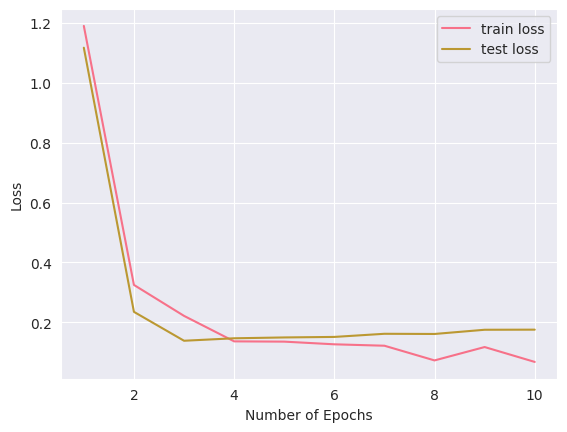

In [34]:
sns.set_style('darkgrid')
sns.set_palette('husl')

plt.plot(list(range(1,11)), train_loss_tracker)
plt.plot(list(range(1,11)), test_loss_tracker)

plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['train loss', 'test loss'])